In [49]:
import skvideo.io
import skvideo.datasets
import numpy as np

In [50]:
videogen = skvideo.io.vread('./video/EFECTO MT Super 8 Overlay.mp4')

In [51]:
frame = videogen[110]

In [52]:
from PIL import Image, ImageFilter

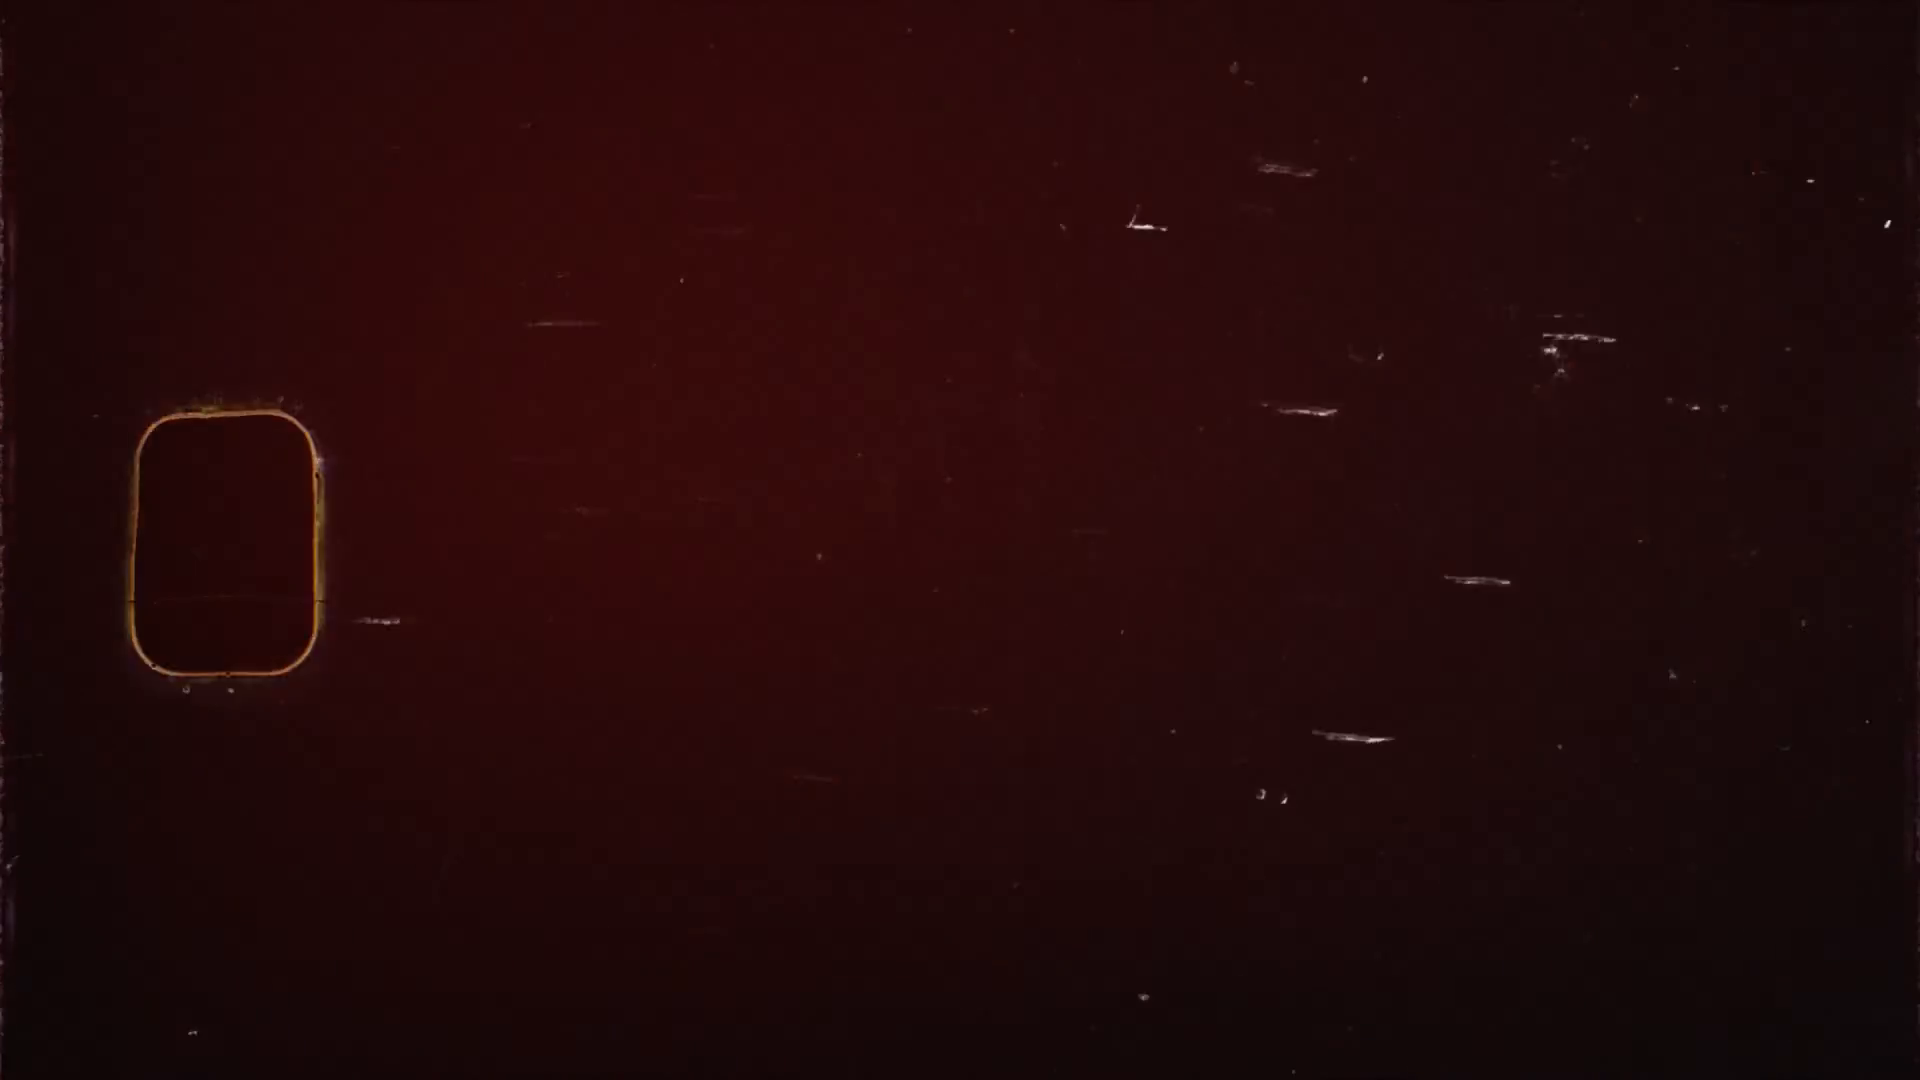

In [53]:
mask = Image.fromarray(frame).convert("RGBA")
mask

In [85]:
mask = Image.fromarray(frame).convert("RGBA")
data = np.invert(mask)
rgb = data[:, :, :3]
color = [230,230,230]  # Original value
black = [0, 0, 0, 255]
mask = np.all(rgb <= color, axis=-1)
data[mask] = black
kernel = np.ones((15,15), np.uint8)
opened = cv2.morphologyEx(data, cv2.MORPH_OPEN, kernel)

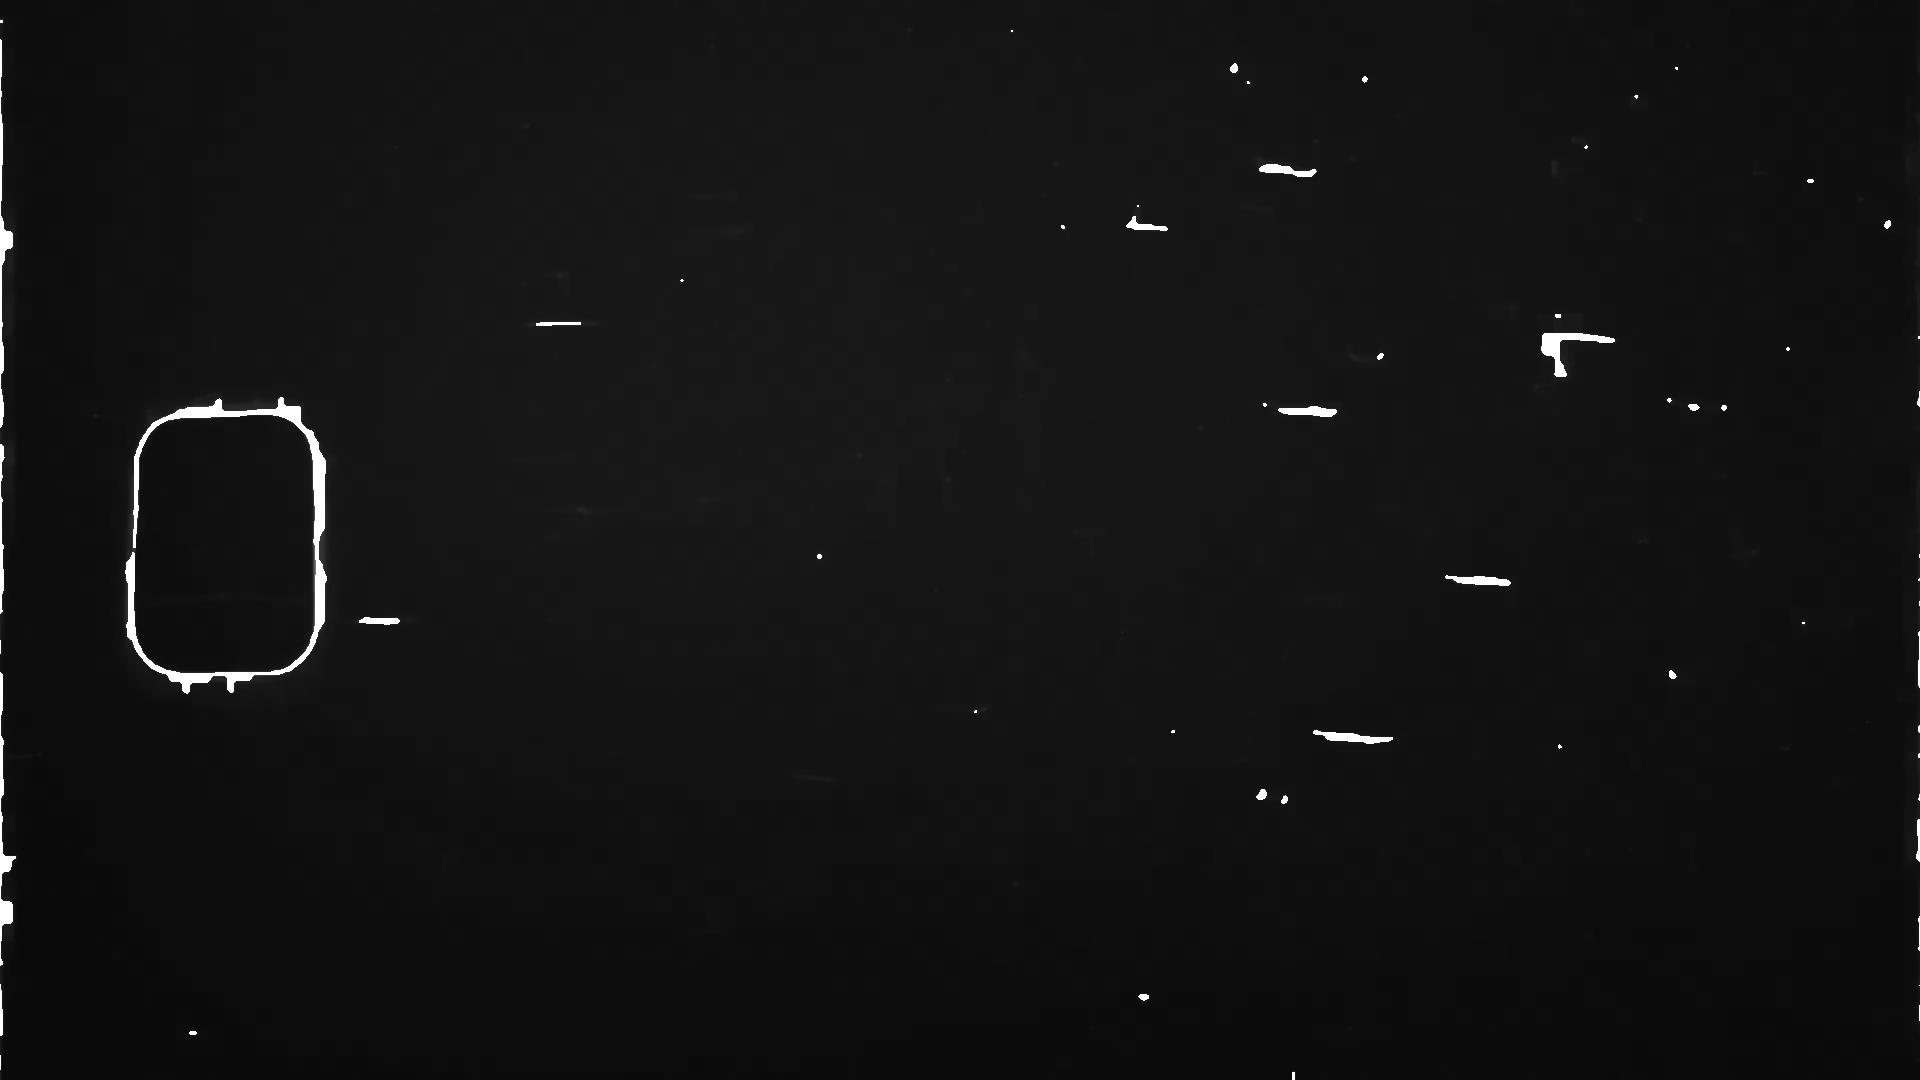

In [86]:
median = cv2.medianBlur(opened,5)
Image.fromarray(np.invert(median)).convert("L")

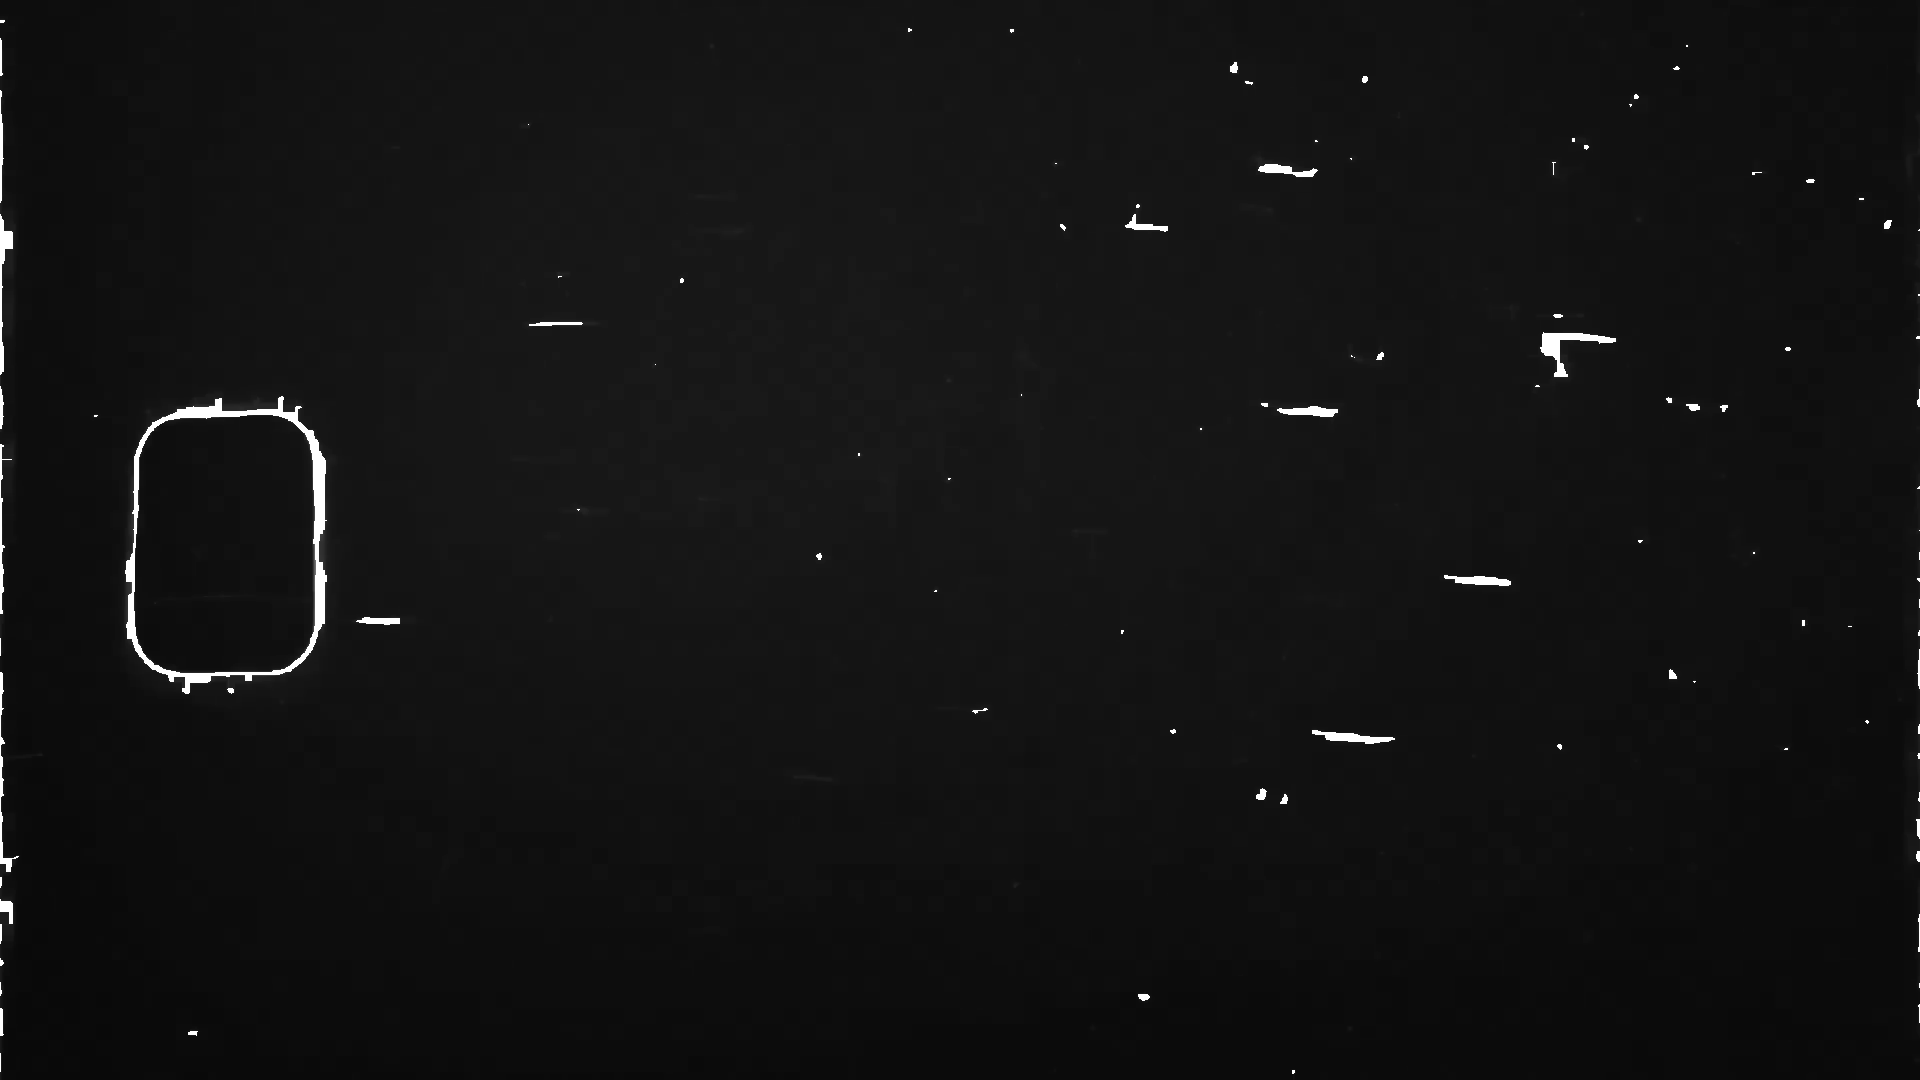

In [46]:
import cv2

In [47]:
image = videogen[110]

frame = cv2.resize(image, (1280, 720))
image = cv2.resize(image, (1280, 720))


u_green = np.array([255, 255, 255])
l_green = np.array([190, 190, 190])

mask = cv2.inRange(frame, l_green, u_green)
res = cv2.bitwise_and(frame, frame, mask = mask)

f = frame - res
f = np.where(f == 0, image, f)
kernel = np.ones((11,11), np.uint8)
opened = cv2.morphologyEx(f, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(f, cv2.MORPH_CLOSE, kernel)

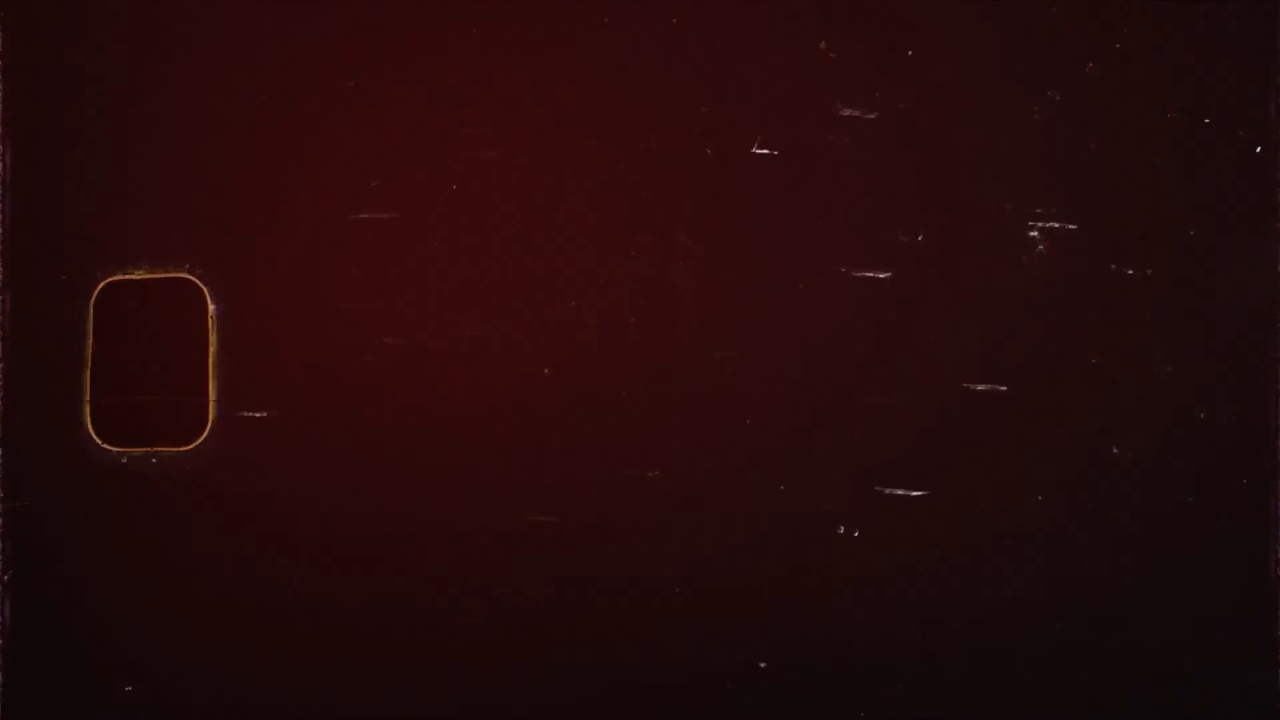

In [48]:
Image.fromarray(f)

In [233]:
def convert_mask(image, resize):
    mask = Image.fromarray(image).convert("L")
    mask = mask.resize(resize, Image.ANTIALIAS)
    mask = np.invert(mask)
    mask[mask<190] = 0
    mask[mask>=190] = 255
    bit_mask = mask
    alpha = mask
    mask = Image.fromarray(mask)
    r = mask.split()
    alpha_r = r[0].point(lambda p: 255-p)
    mask.putalpha(alpha_r)
    mask = mask.convert("RGBA")
    return mask, np.invert(bit_mask)

In [234]:
import random

In [235]:
def create_dirty(resize, defect_count):
    masks = []
    for i in range(defect_count):
        index = random.randint(0, len(videogen))
        _, bit_mask = convert_mask(videogen[index], resize)
        masks.append(bit_mask)
    return masks

In [241]:
merged_mask = create_dirty(image.size, 10)

In [256]:
np_merged_mask = merged_mask[0]
for new_mask in merged_mask[1:]:
    np_merged_mask += new_mask

In [264]:
mr_defect, mr_mask = convert_mask(np_merged_mask, image.size)
mr_defect=mr_defect.filter(ImageFilter.BoxBlur(1))

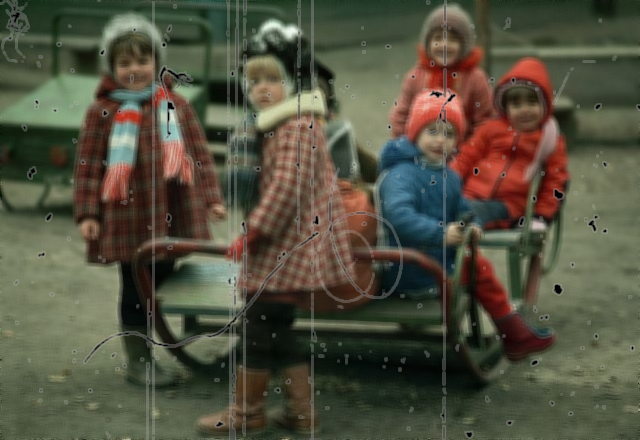

In [265]:
Image.alpha_composite(image, mr_defect)

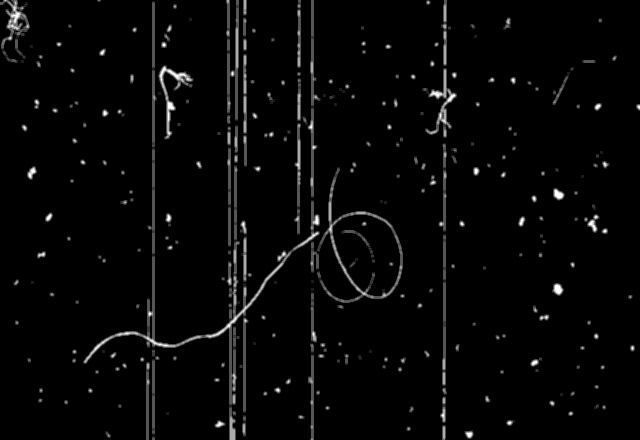

In [266]:
Image.fromarray(mr_mask).filter(ImageFilter.BoxBlur(1))